<a href="https://colab.research.google.com/github/Arvind13s/Malaria-detection-using-CNN/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.19.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arvindsingh13","key":"3149c462e6e5919c4c381d5c58400b9a"}'}

In [5]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown


In [7]:
!unzip cell-images-for-detecting-malaria.zip -d malaria_dataset

Streaming output truncated to the last 5000 lines.
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: malaria_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG

In [8]:
img_width = 64
img_height = 64

In [9]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [10]:
train_data_generator = datagen.flow_from_directory(directory='/content/malaria_dataset' ,
                                              target_size = (img_width, img_height),
                                                   class_mode = 'binary' ,
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 44093 images belonging to 1 classes.


In [11]:
validation_data_generator = datagen.flow_from_directory(directory='/content/malaria_dataset' ,
                                              target_size = (img_width, img_height),
                                                   class_mode = 'binary' ,
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 11023 images belonging to 1 classes.


In [12]:
train_data_generator.labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

#CNN Model building


In [13]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,611,233 (6.15 MB)

 Trainable params: 1,611,233 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [16]:
history = model.fit(train_data_generator,
                    steps_per_epoch = len(train_data_generator),
                    epochs = 10,
                    validation_data = validation_data_generator,
                    validation_steps = len(validation_data_generator))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2755/2756 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9979 - loss: 0.0024

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2756/2756 ━━━━━━━━━━━━━━━━━━━━ 243s 88ms/step - accuracy: 0.9979 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.3947e-12
Epoch 2/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 241s 87ms/step - accuracy: 1.0000 - loss: 1.5445e-14 - val_accuracy: 1.0000 - val_loss: 9.3946e-12
Epoch 3/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 241s 87ms/step - accuracy: 1.0000 - loss: 6.7803e-14 - val_accuracy: 1.0000 - val_loss: 9.3937e-12
Epoch 4/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 240s 87ms/step - accuracy: 1.0000 - loss: 1.8679e-14 - val_accuracy: 1.0000 - val_loss: 9.3935e-12
Epoch 5/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 241s 87ms/step - accuracy: 1.0000 - loss: 1.1817e-13 - val_accuracy: 1.0000 - val_loss: 9.3880e-12
Epoch 6/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 240s 87ms/step - accuracy: 1.0000 - loss: 9.0497e-15 - val_accuracy: 1.0000 - val_loss: 9.3705e-12
Epoch 7/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 241s 88ms/step - accuracy: 1.0000 - loss: 3.3380e-14 - val_accuracy: 1.0000 - val_loss: 9.3176e-12
Epoch 8/10
2756/2756 ━━━━━━━

In [17]:
history.history

{'accuracy': [0.999750554561615, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.00028070982079952955,
  2.1461925999951594e-14,
  6.738651927044523e-14,
  1.6110266807113464e-14,
  5.353138112364035e-14,
  2.8405244803975278e-14,
  5.3348164509017457e-14,
  2.3236185585774442e-14,
  2.255194220658705e-14,
  1.88959294717371e-14],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [9.394659529482485e-12,
  9.394607487778206e-12,
  9.393683747527248e-12,
  9.393461702922323e-12,
  9.388019875378184e-12,
  9.37047661686563e-12,
  9.317596173785692e-12,
  9.27802279448997e-12,
  9.223010376258056e-12,
  9.172423237613359e-12]}

In [18]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, len(history.history['accuracy']) + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

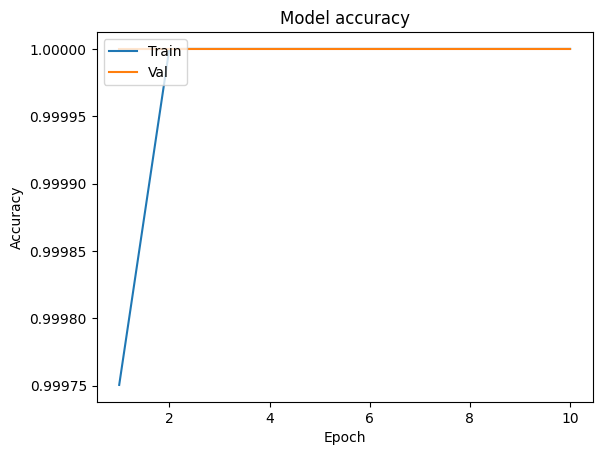

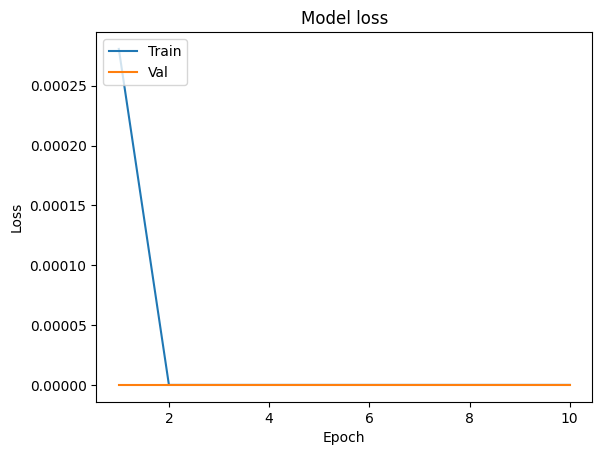

In [19]:
# prompt: generate the graph

plot_learningCurve(history, 10)
